In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv ")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#What is the overall on-time performance

In [5]:
early = wego["ADJUSTED_EARLY_COUNT"].sum()
late = wego["ADJUSTED_LATE_COUNT"].sum()
ontime = wego["ADJUSTED_ONTIME_COUNT"].sum()
total = early + late + ontime
total

338861

In [6]:
wego.shape

(350329, 30)

In [7]:
ontimepercent = round ((ontime / total)* 100, 2)   
ontimepercent

79.69

In [8]:
earlypercent = round ((early / total)* 100, 2)  
earlypercent

2.88

In [9]:
latepercent = round ((late / total)* 100, 2)  
latepercent

17.42

In [10]:
#below is Isabelle's
#Isabelle's looks to be more accurate

In [11]:
on_time_performance = wego.loc[wego['ADJUSTED_ONTIME_COUNT'] == 1]
#on_time_performance = on_time_performance.loc[on_time_performance['TRIP_EDGE'] !=2]
on_time_performance = round((len(on_time_performance) / len(wego)) * 100, 2)
on_time_performance

77.08

In [12]:
#what do the overall distribution of adherence look like?

In [13]:
wego['ROUTE_ABBR'].unique()

array([22, 23,  3,  7, 50, 52, 55, 56], dtype=int64)

In [14]:
#routes = [3, 7, 22, 23, 50, 52, 53, 55, 56]
#filtering = wego[wego['ROUTE_ABBR'].isin(routes)]
route_totals = wego.groupby('ROUTE_ABBR')['ADHERENCE'].mean()
print(route_totals)

ROUTE_ABBR
3    -3.761491
7    -3.346555
22   -1.138107
23   -1.760110
50   -2.505022
52   -3.971342
55   -4.823302
56   -2.703988
Name: ADHERENCE, dtype: float64


In [15]:
#How does direction of travel, route, or location affect the on-time performance?

In [16]:
#used same code as Jacob for finding adherance distribution 

In [17]:
wego['ROUTE_DIRECTION_NAME'].unique()

array(['TO DOWNTOWN', 'FROM DOWNTOWN'], dtype=object)

In [18]:
direction = ['TO DOWNTOWN', 'FROM DOWNTOWN']
filteringdirection = wego[wego['ROUTE_DIRECTION_NAME'].isin(direction)]
direction_totals = filteringdirection.groupby('ROUTE_DIRECTION_NAME')['ADHERENCE'].mean()
print(direction_totals)

ROUTE_DIRECTION_NAME
FROM DOWNTOWN   -3.960287
TO DOWNTOWN     -2.321804
Name: ADHERENCE, dtype: float64


In [19]:
#tried simple code for direction of travel affect on on-time performance 

In [20]:
ontime_by_direction = round((wego.groupby('ROUTE_DIRECTION_NAME')['ADJUSTED_ONTIME_COUNT'].sum()/len(wego))*100)      
ontime_by_direction

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    38.0
TO DOWNTOWN      39.0
Name: ADJUSTED_ONTIME_COUNT, dtype: float64

In [21]:
early_by_direction = round((wego.groupby('ROUTE_DIRECTION_NAME')['ADJUSTED_EARLY_COUNT'].sum()/total)*100)
early_by_direction

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    2.0
TO DOWNTOWN      1.0
Name: ADJUSTED_EARLY_COUNT, dtype: float64

In [22]:
late_by_direction = round((wego.groupby('ROUTE_DIRECTION_NAME')['ADJUSTED_LATE_COUNT'].sum()/total)*100)
late_by_direction

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    12.0
TO DOWNTOWN       6.0
Name: ADJUSTED_LATE_COUNT, dtype: float64

In [23]:
directiontotal = (ontime_by_direction + early_by_direction + late_by_direction)
directiontotal

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    52.0
TO DOWNTOWN      46.0
dtype: float64

In [24]:
ontimebydirection = ontime_by_direction / directiontotal
ontimebydirection

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    0.730769
TO DOWNTOWN      0.847826
dtype: float64

In [25]:
# route, or location affect the on-time performance?

In [26]:
route = wego.groupby(['ROUTE_ABBR','ROUTE_DIRECTION_NAME']).agg({'ADJUSTED_ONTIME_COUNT': 'sum','ADJUSTED_EARLY_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT':'sum'})
route

ADJUSTED_ONTIME_COUNT  ADJUSTED_EARLY_COUNT  \
ROUTE_ABBR ROUTE_DIRECTION_NAME                                                
3          FROM DOWNTOWN                         15447                   639   
           TO DOWNTOWN                           19069                   743   
7          FROM DOWNTOWN                          6542                   298   
           TO DOWNTOWN                            6875                   135   
22         FROM DOWNTOWN                         11008                   373   
           TO DOWNTOWN                           11484                   258   
23         FROM DOWNTOWN                         20646                   629   
           TO DOWNTOWN                           14491                   657   
50         FROM DOWNTOWN                         17788                   661   
           TO DOWNTOWN                           18521                   546   
52         FROM DOWNTOWN                         17399                   882   
           TO DOWNTOWN                           20337                   671   
55         FROM DOWNTOWN                         19233                   803   
           TO DOWNTOWN                           22847                   728   
56         FROM DOWNTOWN                         26351                  1006   
           TO DOWNTOWN                           22010                   746   

                                 ADJUSTED_LATE_COUNT  
ROUTE_ABBR ROUTE_DIRECTION_NAME                       
3          FROM DOWNTOWN                        6680  
           TO DOWNTOWN                          2910  
7          FROM DOWNTOWN                        2186  
           TO DOWNTOWN                          1231  
22         FROM DOWNTOWN                        1538  
           TO DOWNTOWN                           527  
23         FROM DOWNTOWN                        2496  
           TO DOWNTOWN                           734  
50         FROM DOWNTOWN                        2803  
           TO DOWNTOWN                          2310  
52         FROM DOWNTOWN                        7092  
           TO DOWNTOWN                          2946  
55         FROM DOWNTOWN                        9843  
           TO DOWNTOWN                          6905  
56         FROM DOWNTOWN                        6963  
           TO DOWNTOWN                          1874

In [77]:
route['TOTAL'] = (route['ADJUSTED_ONTIME_COUNT'] + route['ADJUSTED_EARLY_COUNT'] + route['ADJUSTED_LATE_COUNT'])
route['OTP_PERCENT'] = round((route['ADJUSTED_ONTIME_COUNT'] / route['TOTAL']) * 100, 2)
route[['ADJUSTED_ONTIME_COUNT', 'TOTAL', 'OTP_PERCENT']]

ADJUSTED_ONTIME_COUNT  TOTAL  OTP_PERCENT
ROUTE_ABBR ROUTE_DIRECTION_NAME                                           
3          FROM DOWNTOWN                         15447  22766        67.85
           TO DOWNTOWN                           19069  22722        83.92
7          FROM DOWNTOWN                          6542   9026        72.48
           TO DOWNTOWN                            6875   8241        83.42
22         FROM DOWNTOWN                         11008  12919        85.21
           TO DOWNTOWN                           11484  12269        93.60
23         FROM DOWNTOWN                         20646  23771        86.85
           TO DOWNTOWN                           14491  15882        91.24
50         FROM DOWNTOWN                         17788  21252        83.70
           TO DOWNTOWN                           18521  21377        86.64
52         FROM DOWNTOWN                         17399  25373        68.57
           TO DOWNTOWN                           20337  23954        84.90
55         FROM DOWNTOWN                         19233  29879        64.37
           TO DOWNTOWN                           22847  30480        74.96
56         FROM DOWNTOWN                         26351  34320        76.78
           TO DOWNTOWN                           22010  24630        89.36

In [79]:
routedf = pd.DataFrame(route)

In [97]:
routedf

ADJUSTED_ONTIME_COUNT  ADJUSTED_EARLY_COUNT  \
ROUTE_ABBR ROUTE_DIRECTION_NAME                                                
3          FROM DOWNTOWN                         15447                   639   
           TO DOWNTOWN                           19069                   743   
7          FROM DOWNTOWN                          6542                   298   
           TO DOWNTOWN                            6875                   135   
22         FROM DOWNTOWN                         11008                   373   
           TO DOWNTOWN                           11484                   258   
23         FROM DOWNTOWN                         20646                   629   
           TO DOWNTOWN                           14491                   657   
50         FROM DOWNTOWN                         17788                   661   
           TO DOWNTOWN                           18521                   546   
52         FROM DOWNTOWN                         17399                   882   
           TO DOWNTOWN                           20337                   671   
55         FROM DOWNTOWN                         19233                   803   
           TO DOWNTOWN                           22847                   728   
56         FROM DOWNTOWN                         26351                  1006   
           TO DOWNTOWN                           22010                   746   

                                 ADJUSTED_LATE_COUNT  TOTAL  OTP_PERCENT  
ROUTE_ABBR ROUTE_DIRECTION_NAME                                           
3          FROM DOWNTOWN                        6680  22766        67.85  
           TO DOWNTOWN                          2910  22722        83.92  
7          FROM DOWNTOWN                        2186   9026        72.48  
           TO DOWNTOWN                          1231   8241        83.42  
22         FROM DOWNTOWN                        1538  12919        85.21  
           TO DOWNTOWN                           527  12269        93.60  
23         FROM DOWNTOWN                        2496  23771        86.85  
           TO DOWNTOWN                           734  15882        91.24  
50         FROM DOWNTOWN                        2803  21252        83.70  
           TO DOWNTOWN                          2310  21377        86.64  
52         FROM DOWNTOWN                        7092  25373        68.57  
           TO DOWNTOWN                          2946  23954        84.90  
55         FROM DOWNTOWN                        9843  29879        64.37  
           TO DOWNTOWN                          6905  30480        74.96  
56         FROM DOWNTOWN                        6963  34320        76.78  
           TO DOWNTOWN                          1874  24630        89.36

<Axes: xlabel='ROUTE_DIRECTION_NAME', ylabel='OTP_PERCENT'>

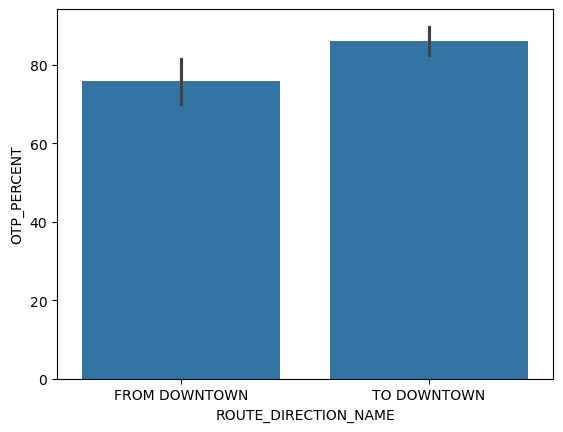

In [99]:
sns.barplot(x = 'ROUTE_DIRECTION_NAME', y = 'OTP_PERCENT', data = routedf)

In [61]:
on_time_performance = wego[wego['ADJUSTED_ONTIME_COUNT'] == 1] # on-time rows
on_time_performance_pct = round((len(on_time_performance) / len(wego)) * 100, 2) # overall ot performance pct
print("Overall on-time performance is", on_time_performance_pct, "%")
block_count = on_time_performance['BLOCK_ABBR'].value_counts().reset_index()
block_count.columns = ['BLOCK_ABBR', 'on_time_count']
block_count = block_count.sort_values(by='on_time_count', ascending=False) # count on-time per block and calculate percent of total dataset
block_count['percent_of_total'] = round((block_count['on_time_count'] / len(wego)) * 100, 2) # % of total col
block_count

Overall on-time performance is 77.08 %


,BLOCK_ABBR,on_time_count,percent_of_total
0,5003,7134,2.04
1,2310,7002,2.00
2,5004,6884,1.97
3,300,6330,1.81
4,2311,6297,1.80
...,...,...,...
97,5094,37,0.01
98,5690,33,0.01
99,8401,32,0.01
100,8601,31,0.01
